<a href="https://colab.research.google.com/github/Sphinx500/Train-and-evaluate-regression-models/blob/main/Optimizar%20y%20guardar%20modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: optimizar y guardar modelos

# Regresión: optimizar y guardar modelos
En el cuaderno anterior, usamos modelos de regresión complejos para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este portátil veremos si podemos mejorar aún más el rendimiento de estos modelos.

Comencemos cargando los datos de uso compartido de bicicletas como un Pandas DataFrame y viendo las primeras filas. Como de costumbre, también dividiremos nuestros datos en conjuntos de datos de prueba y entrenamiento.

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


--2021-10-12 16:22:32--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2021-10-12 16:22:33 (4.72 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]

   instant    dteday  season  yr  ...       hum  windspeed  rentals  day
0        1  1/1/2011       1   0  ...  0.805833   0.160446      331    1
1        2  1/2/2011       1   0  ...  0.696087   0.248539      131    2
2        3  1/3/2011       1   0  ...  0.437273   0.248309      120    3
3        4  1/4/2011       1   0  ...  0.590435   0.16

Ahora tenemos los siguientes cuatro conjuntos de datos:

* X_train: los valores de características que usaremos para entrenar el modelo
* y_train: Las etiquetas correspondientes que usaremos para entrenar el modelo.
* X_test: los valores de características que usaremos para validar el modelo
* y_test: las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de conjunto de impulso, como en nuestro último cuaderno. Recuerde que un estimador de aumento de gradiente es como un algoritmo de bosque aleatorio, pero en lugar de construir todos los árboles de forma independiente y tomar el resultado promedio, cada árbol se basa en las salidas del anterior en un intento de reducir gradualmente la pérdida (error) en el modelo.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 103667.33841803382
RMSE: 321.97412693884866
R2: 0.7967666895712298


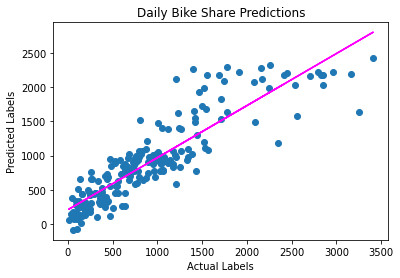

In [2]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Optimizar los hiperparámetros
Eche un vistazo a la definición del estimador GradientBoostingRegressor en la salida anterior y observe que, al igual que los otros estimadores que probamos anteriormente, incluye una gran cantidad de parámetros que controlan la forma en que se entrena el modelo. En el aprendizaje automático, el término parámetros se refiere a valores que se pueden determinar a partir de datos; los valores que especifique para afectar el comportamiento de un algoritmo de entrenamiento se denominan más correctamente hiperparámetros.

Los hiperparámetros específicos de un estimador varían según el algoritmo que encapsula el estimador. En el caso del estimador GradientBoostingRegressor, el algoritmo es un conjunto que combina múltiples árboles de decisión para crear un modelo predictivo general. Puede obtener información sobre los hiperparámetros de este estimador en la documentación de Scikit-Learn.

No entraremos en los detalles de cada hiperparámetro aquí, pero funcionan juntos para afectar la forma en que el algoritmo entrena un modelo. En muchos casos, los valores predeterminados proporcionados por Scikit-Learn funcionarán bien; pero puede haber alguna ventaja al modificar los hiperparámetros para obtener un mejor rendimiento predictivo o reducir el tiempo de entrenamiento.

Entonces, ¿cómo sabe qué valores de hiperparámetros debe usar? Bueno, en ausencia de una comprensión profunda de cómo funciona el algoritmo subyacente, deberá experimentar. Afortunadamente, SciKit-Learn proporciona una forma de ajustar los hiperparámetros probando múltiples combinaciones y encontrando el mejor resultado para una métrica de rendimiento determinada.

Intentemos usar un enfoque de búsqueda de cuadrícula para probar combinaciones de una cuadrícula de valores posibles para los hiperparámetros learning_rate y n_estimators del estimador GradientBoostingRegressor.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 103714.78097909324
RMSE: 322.0477930045372
R2: 0.7966736814079407


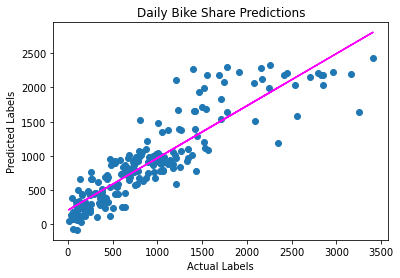

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Preprocesar los datos
Entrenamos un modelo con datos que se cargaron directamente desde un archivo de origen, con resultados solo moderadamente exitosos.

En la práctica, es común realizar algún preprocesamiento de los datos para que sea más fácil para el algoritmo ajustar un modelo. Existe una amplia gama de transformaciones de preprocesamiento que puede realizar para preparar sus datos para el modelado, pero nos limitaremos a algunas técnicas comunes:

**Escala de características numéricas**

La normalización de entidades numéricas para que estén en la misma escala evita que las entidades con valores grandes produzcan coeficientes que afecten desproporcionadamente a las predicciones. Por ejemplo, suponga que sus datos incluyen las siguientes características numéricas:


| A |  B  |  C  |
| - | --- | --- |
| 3 | 480 | 65  |


La normalización de estas características a la misma escala puede dar como resultado los siguientes valores (suponiendo que A contiene valores de 0 a 10, B contiene valores de 0 a 1000 y C contiene valores de 0 a 100):

|  A  |  B  |  C  |
| --  | --- | --- |
| 0.3 | 0.48| 0.65|


Hay varias formas de escalar datos numéricos, como calcular los valores mínimo y máximo para cada columna y asignar un valor proporcional entre 0 y 1, o usar la desviación media y estándar de una variable distribuida normalmente para mantener la misma extensión de valores en una escala diferente.

# Codificación de variables categóricas
Los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto, por lo que generalmente necesita convertir características categóricas en representaciones numéricas. Por ejemplo, suponga que sus datos incluyen la siguiente característica categórica.

| Size |
| ---- |
|  0   |
|  1   |
|  2   |

Otra técnica común es usar * una codificación en caliente * para crear características binarias individuales (0 o 1) para cada valor de categoría posible. Por ejemplo, podría usar la codificación one-hot para traducir las posibles categorías en columnas binarias como esta:


|  Size_S  |  Size_M  |  Size_L  |
| -------  | -------- | -------- |
|    1     |     0    |    0     |
|    0     |     1    |    0     |
|    0     |     0    |    1     |


Para aplicar estas transformaciones de preprocesamiento al alquiler de bicicletas, haremos uso de una función de Scikit-Learn llamada canalizaciones. Estos nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. Luego, puede ajustar toda la canalización a los datos, de modo que el modelo encapsule todos los pasos de preprocesamiento, así como el algoritmo de regresión. Esto es útil, porque cuando queremos usar el modelo para predecir valores a partir de nuevos datos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías utilizadas con los datos de entrenamiento).

In [4]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

Bien, el modelo está entrenado, incluidos los pasos de preprocesamiento. Veamos cómo funciona con los datos de validación.

MSE: 105422.18367890062
RMSE: 324.6878249625332
R2: 0.7933264255777813


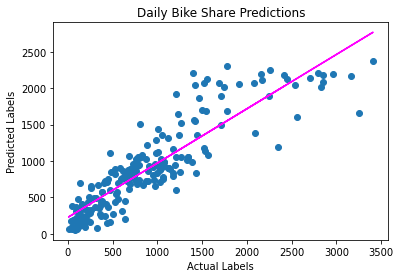

In [5]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

La canalización está compuesta por las transformaciones y el algoritmo utilizado para entrenar el modelo. Para probar un algoritmo alternativo, simplemente puede cambiar ese paso a un tipo diferente de estimador.

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

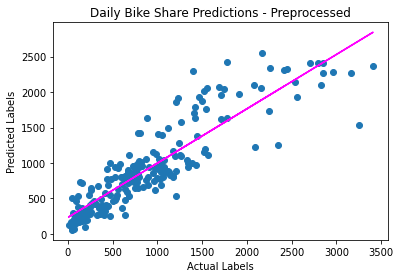

In [6]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ahora hemos visto una serie de técnicas comunes que se utilizan para entrenar modelos predictivos para la regresión. En un proyecto real, probablemente probaría algunos algoritmos, hiperparámetros y transformaciones de preprocesamiento más; pero a estas alturas ya debería haber captado la idea general. Exploremos cómo puede usar el modelo entrenado con nuevos datos.

# Utilice el modelo entrenado
Primero, salvemos el modelo.

In [7]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Ahora, podemos cargarlo cuando lo necesitemos y usarlo para predecir etiquetas para nuevos datos. A esto a menudo se le llama puntuación o inferencia.

In [8]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 101 rentals


El método ** predecir ** del modelo acepta una matriz de observaciones, por lo que puede usarlo para generar múltiples predicciones como un lote. Por ejemplo, suponga que tiene un pronóstico del tiempo para los próximos cinco días; puede utilizar el modelo para predecir el alquiler de bicicletas para cada día en función de las condiciones meteorológicas previstas.

In [9]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
572.0
752.0
239.0
187.0
273.0


# Resumen
Con esto concluyen los cuadernos de este módulo sobre regresión. En este cuaderno, ejecutamos una regresión compleja, la ajustamos, guardamos el modelo y lo usamos para predecir resultados para el futuro.